In [22]:
# Probabilistic Supervised Learning - Naive Bayes(Binomial): Create a dataset from the sample
# given to you(e.g. “Titanic, Play Tennis Probability”, “Shopper Buying Probability” etc.). Perform
# the necessary pre-processing steps such as encoding. Train the model using Naive Bayes
# Classifier for Binomial predictions. Give new test data and predict the classification output.
# Handcode the classification probability and compare with the model output. Analyze and write
# the inference.

In [23]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [24]:
# preprocessing drops
df.dropna()
df.drop(['Name'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [26]:
# preprocess encode and scale
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
df['Sex'] = encoder.fit_transform(df['Sex'])
df[['Fare','Age']] = scaler.fit_transform(df[['Fare','Age']])
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507


In [27]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2)

In [32]:
y_pred = model.predict(x_test)

<AxesSubplot: >

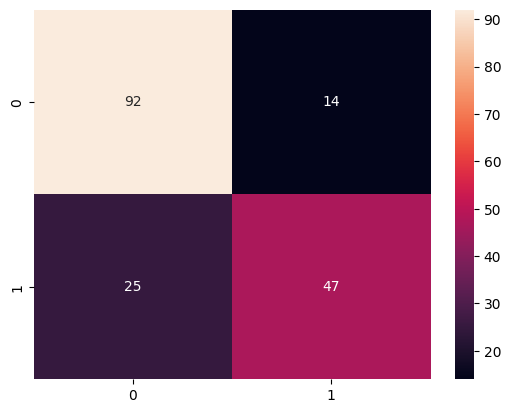

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True,color='orange')

AUC 0.7767295597484276
ROC curve


<AxesSubplot: >

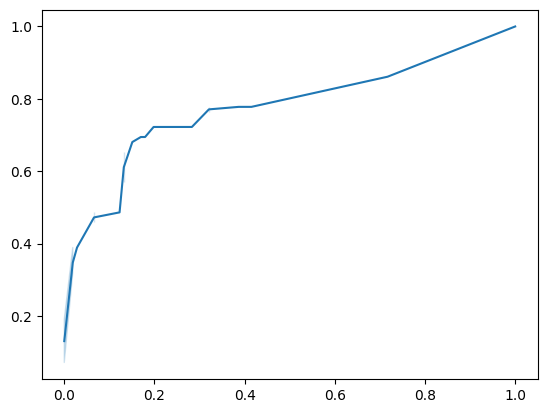

In [39]:
from sklearn.metrics import roc_curve,auc
prob=model.predict_proba(x_test)
prob=prob[:,1]
fpr,tpr,_=roc_curve(y_test,prob)
print("AUC",auc(fpr,tpr))
print("ROC curve")
sns.lineplot(x=fpr,y=tpr)